In [71]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [72]:
df=pd.read_csv('weatherdata.csv')

In [73]:
df.head()

,week,mean_temp,mean_rainfall(mm),mean_humidity,mean_severity_index,disease_level
0,1,30,130,80,7,high
1,2,25,100,70,8,high
2,3,32,150,85,7,high
3,4,33,130,90,7,high
4,5,25,35,70,3,mild


<AxesSubplot:xlabel='disease_level', ylabel='mean_temp'>

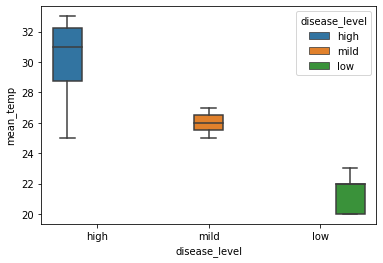

In [74]:
import seaborn as sns
sns.boxplot(x= 'disease_level', y='mean_temp', data=df, hue='disease_level')

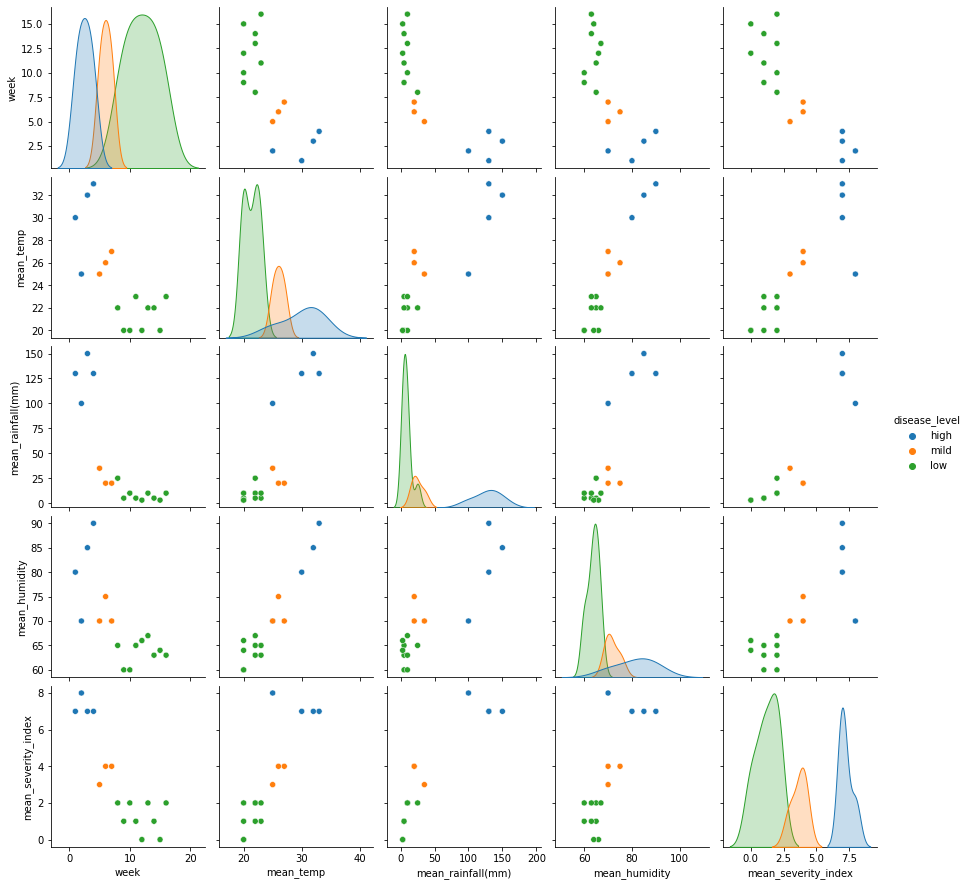

In [75]:
sns.pairplot(df, hue='disease_level')
plt.show()

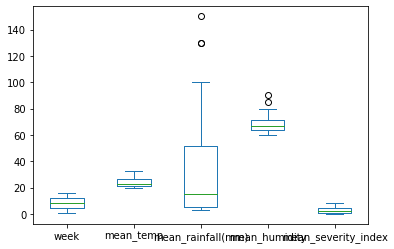

In [95]:
df.plot(kind='box')
plt.show()

In [105]:
df.disease_level.unique()

array(['high', 'mild', 'low'], dtype=object)

In [106]:
X

,mean_temp,mean_rainfall(mm),mean_humidity,mean_severity_index
0,30,130,80,7
1,25,100,70,8
2,32,150,85,7
3,33,130,90,7
4,25,35,70,3
5,26,20,75,4
6,27,20,70,4
7,22,25,65,2
8,20,5,60,1
9,20,10,60,2


In [82]:
y=df['disease_level']

In [108]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=20)

In [109]:
from sklearn.ensemble import BaggingClassifier
clf=BaggingClassifier()
clf.fit(X_train, y_train)

BaggingClassifier()

In [113]:
y_predict=clf.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [115]:
accuracy_score(y_test, y_predict)

1.0

In [116]:
print("Classification Report:\n ", classification_report(y_test, y_predict))

Classification Report:
                precision    recall  f1-score   support

        high       1.00      1.00      1.00         1
         low       1.00      1.00      1.00         3
        mild       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [117]:
confusion_matrix(y_test, y_predict)

array([[1, 0, 0],
       [0, 3, 0],
       [0, 0, 1]], dtype=int64)

<AxesSubplot:>

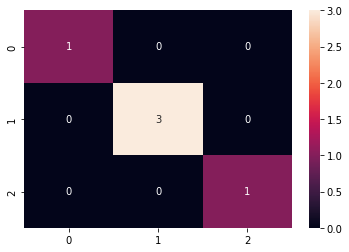

In [118]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)

In [119]:
clf.predict([[20, 100, 80, 7]])

C:\Users\Baki\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array(['high'], dtype=object)

In [ ]:
# roc_curve is not possible in case of multiclass classification

from sklearn.metrics import roc_curve, auc
bg_fpr, bg_tpr, threshold=roc_curve(y_test, y_predict, pos_label=1)
auc_bg=auc(bg_fpr, bg_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(bg_fpr, bg_tpr, linestyle='...', label='BaggingClassifier (auc=%0.3f)' % auc_bg)

plt.xlabel('False positive rate -->')
plt.ylabel('True positive rate -->')

plt.legend()
plt.show()